Pairwise Distance Matrix:
[[0.         0.4417615  0.40986002 ... 1.86761579 1.61285614 1.87643585]
 [0.4417615  0.         0.20167862 ... 1.58571571 1.36984427 1.58126972]
 [0.40986002 0.20167862 0.         ... 1.51702021 1.27323698 1.51758353]
 ...
 [1.86761579 1.58571571 1.51702021 ... 0.         0.36349531 0.09383337]
 [1.61285614 1.36984427 1.27323698 ... 0.36349531 0.         0.37989784]
 [1.87643585 1.58126972 1.51758353 ... 0.09383337 0.37989784 0.        ]]
Linkage Matrix:
[[3.70000000e+01 3.90000000e+01 6.46734653e-02 2.00000000e+00]
 [3.80000000e+01 4.00000000e+01 1.11397618e-01 2.00000000e+00]
 [4.10000000e+01 4.20000000e+01 1.21416724e-01 3.00000000e+00]
 [3.00000000e+00 5.00000000e+00 1.23395884e-01 2.00000000e+00]
 [3.30000000e+01 3.50000000e+01 1.36781674e-01 2.00000000e+00]
 [2.10000000e+01 2.30000000e+01 1.50742458e-01 2.00000000e+00]
 [7.00000000e+00 9.00000000e+00 1.64060358e-01 2.00000000e+00]
 [4.00000000e+00 8.00000000e+00 1.67273112e-01 2.00000000e+00]
 [4.500000

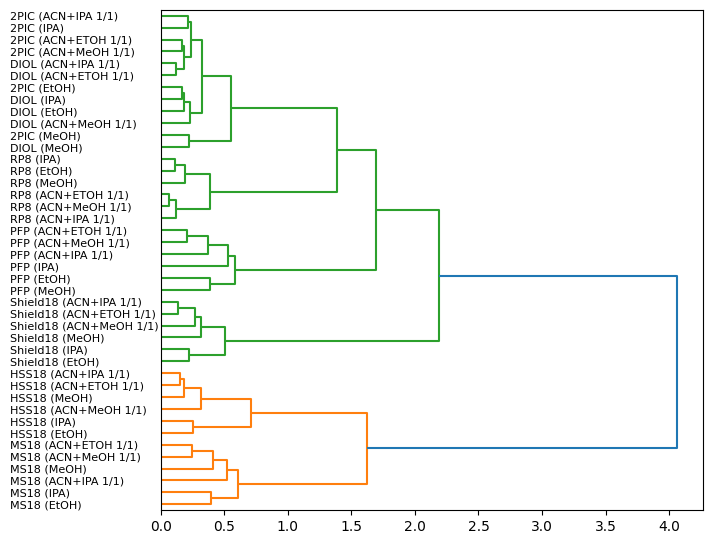

In [5]:
import pandas as pd

# Load the CSV file
# dend4.csv pro alkoholy i ACN, dend5.csv jen pro alkoholy v 90/10 a zahrnuje i 1AA kolonu, dend6.csv bez 1AA pro 95/5 alkoholy i ACN, dend.7 jen pro alkoholy
data = pd.read_csv('D:/Python/dend6.csv', delimiter=';')

# Separate the compound names (first column) and the normalized data
compounds = data['compound']  # Store compound names
data_values = data.iloc[:, 1:]  # Extract only the numerical values

from scipy.spatial.distance import pdist, squareform

from sklearn.preprocessing import StandardScaler

# Apply z-score normalization (centered and reduced)
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

# Then use this in distance calculation
distance_matrix = pdist(data_normalized.T, metric='euclidean')

# Convert the condensed distance matrix to a square form for easier visualization
distance_square = squareform(distance_matrix)

# Optional: Print the distance matrix to inspect
print("Pairwise Distance Matrix:")
print(distance_square)

from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering (average linkage)
linkage_matrix = linkage(distance_matrix, method='average')

# Optional: Print the linkage matrix to inspect
print("Linkage Matrix:")
print(linkage_matrix)

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(7, 6.5))
dendrogram(linkage_matrix, labels=data_values.columns, leaf_rotation=0, orientation='right')

# Get the current axis
ax = plt.gca()

# Align the y-axis labels to the left
for label in ax.get_yticklabels():
    label.set_ha('left')  # Set horizontal alignment to 'left'
    label.set_position((-0.26, label.get_position()[1]))  # Add offset to the labels for better readability, pro alkoholy bez ACN je to -0.21

#plt.title("Dendrogram of Stationary Phases")
#plt.xlabel("Stationary Phases")
#plt.ylabel("Distance")

# Save and display the plot
plt.savefig(f'D:/Python/dendrogramarticleACN.tiff', dpi=1000, bbox_inches='tight', pad_inches=0)
plt.show()
